In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv("F:/bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.isnull().sum().sum()

0

In [8]:
data[data.duplicated()].sum()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [9]:
categorical=data.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [14]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [11]:
data['job'].value_counts().values

array([9732, 9458, 7597, 5171, 4154, 2264, 1579, 1487, 1303, 1240,  938,
        288], dtype=int64)

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

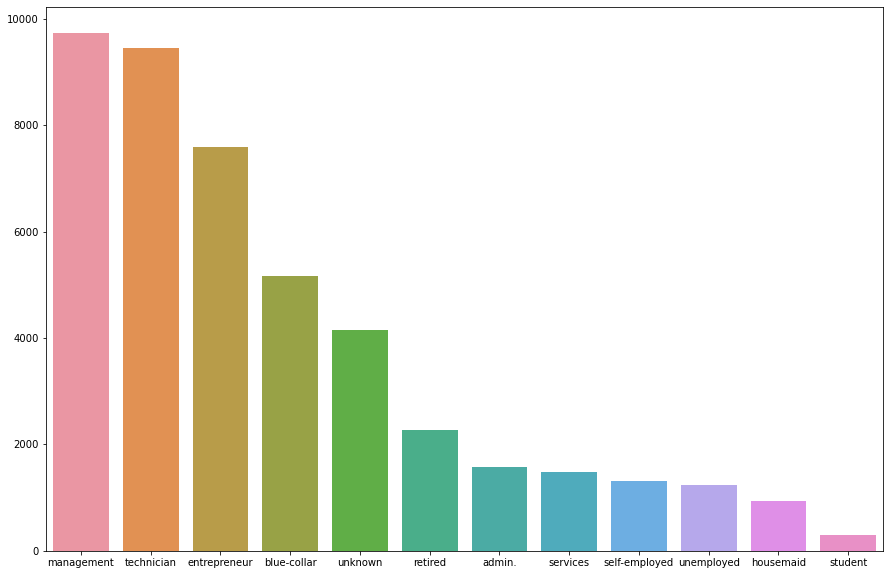

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(data['job'].unique(),data['job'].value_counts().values,data=data)

In [17]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
data['marital'].value_counts().values

array([27214, 12790,  5207], dtype=int64)

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

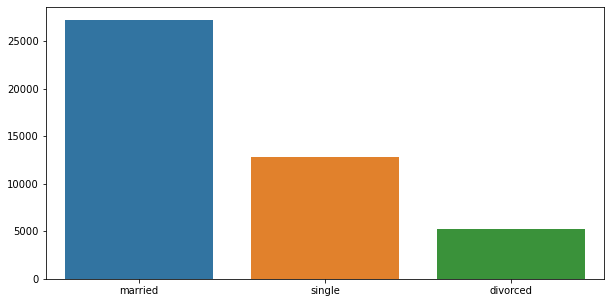

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data['marital'].unique(),data['marital'].value_counts().values,data=data)

In [24]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [29]:
data['education'].value_counts().values

array([23202, 13301,  6851,  1857], dtype=int64)

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

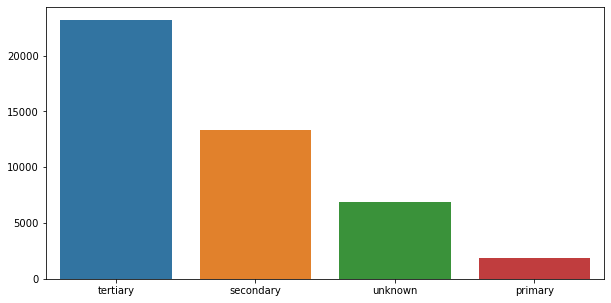

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(data['education'].unique(),data['education'].value_counts().values,data=data)

In [32]:
#Our observations:

#Job: The audiences of these campaigns target mostly administrators, blue-collars, and technicians.
#Marital status: Most of them are married; married clients are twice as single people.
#Education: Most clients have university education level while illiterate people are very less.

In [33]:
dummies=pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [34]:
dummies.shape

(45211, 36)

In [45]:
data_new=pd.concat([data,dummies],axis=1)
data_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,0,0,0,1,0


In [47]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  y   

In [48]:
data_new.drop(columns=categorical.columns,axis=1,inplace=True)
data_new.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [49]:
data_new.shape

(45211, 43)

In [50]:
corr=data_new.corr()
corr

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.044002,0.021792,0.086650,...,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.022967,0.035526,-0.000816,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.048757,0.009642,0.001661,...,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.008466,0.035240,-0.030271,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.022898,-0.002312,0.003955,...,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.032952,-0.030321,0.086256,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.009637,-0.001327,-0.008046,...,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.001958,0.042389,-0.003491,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.008986,0.002128,0.003097,...,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.020107,-0.057486,0.107965,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.020063,-0.014203,-0.031350,...,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.389791,0.228539,-0.869962,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.017095,-0.008181,-0.015204,...,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.306615,0.201424,-0.532763,0.093236
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,1.000000,-0.096585,-0.087951,...,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.001342,-0.053074,0.022194,-0.072083
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.096585,1.000000,-0.030969,...,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,-0.013506,-0.019111,0.014901,-0.019662
job_housemaid,0.086650,0.001661,0.003955,-0.008046,0.003097,-0.031350,-0.015204,-0.087951,-0.030969,1.000000,...,0.052663,-0.000110,-0.066673,-0.013343,0.006155,-0.002265,-0.016769,-0.009375,0.026059,-0.015195


<AxesSubplot:>

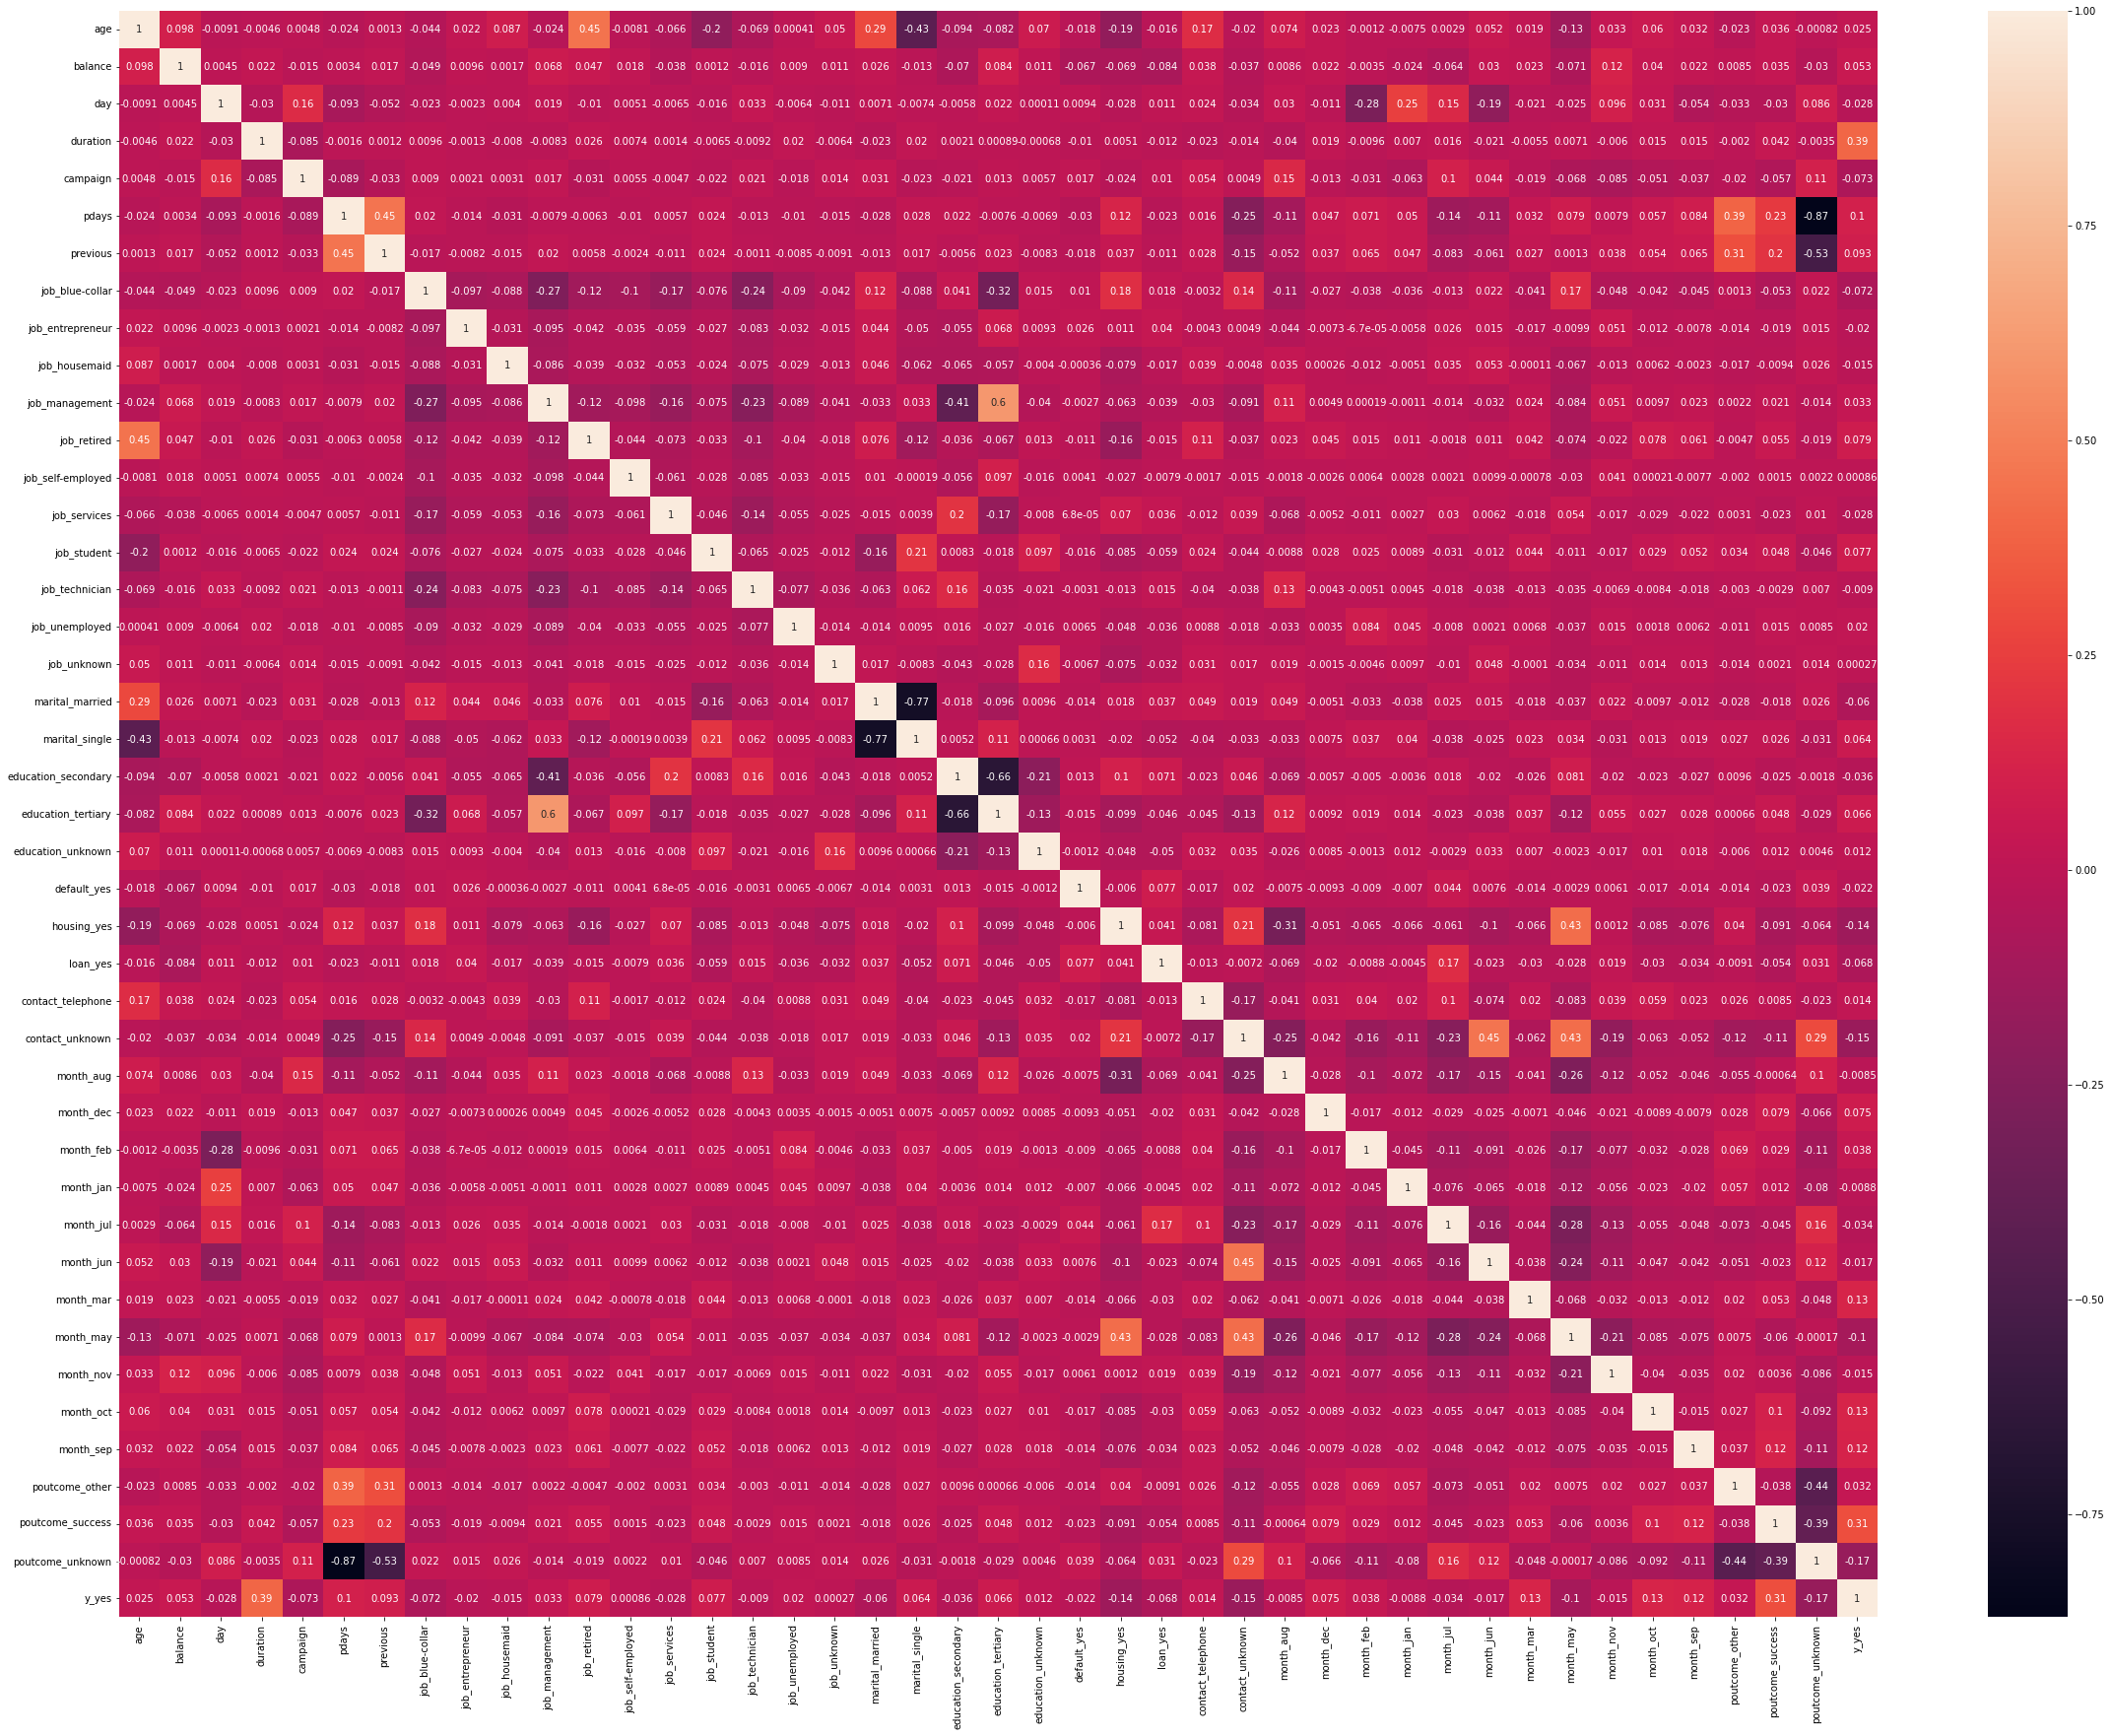

In [69]:
plt.figure(figsize=(40,30))
sns.heatmap(corr,annot=True)

In [59]:
data_new['y_yes']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [60]:
x=data_new.drop('y_yes',axis=1)
x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [61]:
y=data_new['y_yes']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [159]:
x_train.shape,y_train.shape

((31647, 42), (31647,))

In [160]:
x_test.shape,y_test.shape

((13564, 42), (13564,))

In [161]:
scaler=StandardScaler()
scaler

StandardScaler()

In [162]:
x_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [163]:
a=x_train.columns
a

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [184]:
x_train_scaled=scaler.fit_transform(x_train)

In [185]:
x_train=pd.DataFrame(x_train_scaled,columns=a)
x_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.761834,0.398789,-0.098072,0.124365,-0.245224,-0.410320,-0.236992,1.921980,-0.187337,-0.166934,...,-0.424549,-0.366637,-0.102809,1.510922,-0.312343,-0.129251,-0.112712,-0.207636,-0.184151,0.472205
1,0.856086,-0.414842,0.142161,-0.931432,1.689925,-0.410320,-0.236992,1.921980,-0.187337,-0.166934,...,2.355442,-0.366637,-0.102809,-0.661848,-0.312343,-0.129251,-0.112712,-0.207636,-0.184151,0.472205
2,1.798606,0.813135,0.262278,-0.931432,0.722351,-0.410320,-0.236992,-0.520297,-0.187337,-0.166934,...,-0.424549,2.727490,-0.102809,-0.661848,-0.312343,-0.129251,-0.112712,-0.207636,-0.184151,0.472205
3,0.290574,-0.408753,-0.458422,-0.695522,-0.567748,2.871312,0.572516,1.921980,-0.187337,-0.166934,...,-0.424549,-0.366637,-0.102809,1.510922,-0.312343,-0.129251,-0.112712,-0.207636,-0.184151,-2.117723
4,-0.369190,-0.441760,-1.419356,-0.494417,-0.567748,-0.410320,-0.236992,1.921980,-0.187337,-0.166934,...,-0.424549,-0.366637,-0.102809,-0.661848,-0.312343,-0.129251,-0.112712,-0.207636,-0.184151,0.472205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-0.180686,-0.375106,-1.539473,-0.223700,-0.245224,-0.410320,-0.236992,-0.520297,5.337972,-0.166934,...,-0.424549,2.727490,-0.102809,-0.661848,-0.312343,-0.129251,-0.112712,-0.207636,-0.184151,0.472205
31643,-1.123206,0.074811,1.223211,0.449226,-0.245224,-0.410320,-0.236992,-0.520297,-0.187337,-0.166934,...,-0.424549,-0.366637,-0.102809,1.510922,-0.312343,-0.129251,-0.112712,-0.207636,-0.184151,0.472205
31644,-1.028954,0.456150,0.262278,0.101161,-0.245224,0.961999,0.572516,-0.520297,-0.187337,-0.166934,...,-0.424549,-0.366637,-0.102809,-0.661848,3.201604,-0.129251,-0.112712,-0.207636,-0.184151,-2.117723
31645,-0.369190,-0.323833,-0.338306,-0.250772,-0.245224,-0.410320,-0.236992,1.921980,-0.187337,-0.166934,...,-0.424549,-0.366637,-0.102809,1.510922,-0.312343,-0.129251,-0.112712,-0.207636,-0.184151,0.472205


In [186]:
a1=x_test.columns

In [187]:
x_test_scaled=scaler.fit_transform(x_test)

In [188]:
x_test=pd.DataFrame(x_test_scaled,columns=a1)
x_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-0.656162,-0.407854,-0.815683,-0.174774,0.073724,1.422139,2.927386,-0.531760,-0.177434,-0.170232,...,-0.423407,-0.364530,9.586663,-0.661187,-0.305375,-0.127806,-0.116621,-0.202046,5.260849,-2.113042
1,-0.750156,-0.170408,1.348904,-0.025788,1.690794,-0.414167,-0.306220,1.880546,-0.177434,-0.170232,...,-0.423407,2.743256,-0.104312,-0.661187,-0.305375,-0.127806,-0.116621,-0.202046,-0.190083,0.473251
2,1.317709,-0.463107,0.507120,-0.519795,-0.573104,-0.414167,-0.306220,-0.531760,-0.177434,-0.170232,...,-0.423407,2.743256,-0.104312,-0.661187,-0.305375,-0.127806,-0.116621,-0.202046,-0.190083,0.473251
3,-1.220125,-0.384075,-0.935938,-0.257109,-0.573104,-0.414167,-0.306220,-0.531760,-0.177434,-0.170232,...,2.361796,-0.364530,-0.104312,-0.661187,-0.305375,-0.127806,-0.116621,-0.202046,-0.190083,0.473251
4,-1.032138,-0.463107,0.266610,0.334915,-0.249690,1.351512,0.232714,-0.531760,-0.177434,-0.170232,...,-0.423407,-0.364530,-0.104312,-0.661187,3.274664,-0.127806,-0.116621,-0.202046,-0.190083,-2.113042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,1.599691,0.269165,-1.777721,-0.374729,-0.249690,-0.414167,-0.306220,-0.531760,-0.177434,-0.170232,...,-0.423407,2.743256,-0.104312,-0.661187,-0.305375,-0.127806,-0.116621,-0.202046,-0.190083,0.473251
13560,-0.656162,-0.033676,-0.334664,-0.617812,-0.249690,0.655330,5.083123,-0.531760,-0.177434,-0.170232,...,-0.423407,-0.364530,-0.104312,-0.661187,-0.305375,-0.127806,-0.116621,-0.202046,5.260849,-2.113042
13561,0.095789,-0.313086,0.266610,-0.574684,-0.573104,3.329072,0.232714,1.880546,-0.177434,-0.170232,...,-0.423407,-0.364530,-0.104312,1.512430,-0.305375,-0.127806,-0.116621,-0.202046,-0.190083,-2.113042
13562,1.693684,1.545569,0.266610,1.471913,-0.573104,-0.414167,-0.306220,-0.531760,-0.177434,-0.170232,...,-0.423407,2.743256,-0.104312,-0.661187,-0.305375,-0.127806,-0.116621,-0.202046,-0.190083,0.473251


In [189]:
model=LogisticRegression()
model

LogisticRegression()

In [190]:
model_fit=model.fit(x_train,y_train)
model_fit

LogisticRegression()

In [191]:
pred=model_fit.predict(x_test)
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [192]:
residual=pd.DataFrame({'Actual':y_test,'Predict':pred,'Error':(y_test-pred)})
residual

,Actual,Predict,Error
43254,1,1,0
12384,0,0,0
11709,0,0,0
13055,0,0,0
25305,0,0,0
...,...,...,...
39783,0,0,0
41025,0,0,0
38913,0,0,0
11220,0,0,0


In [193]:
r2_score(y_test,pred)

0.04151386776418753

In [194]:
cf=confusion_matrix(y_test,pred)
cf

array([[11727,   299],
       [ 1008,   530]], dtype=int64)

In [195]:
accuracy_score(y_test,pred)

0.9036419935122383